<a href="https://colab.research.google.com/github/ehpub/CS-Example/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터셋 설명하기

In [1]:
import sys
sys.path.append('/content/drive/MyDrive/code')

In [2]:
import random

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [3]:
from collections import Counter
friend_counts = Counter(num_friends)

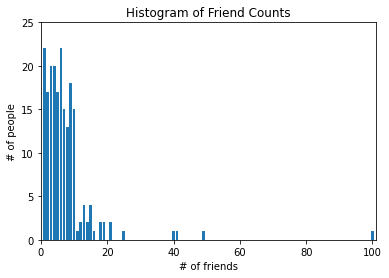

In [4]:
import matplotlib.pyplot as plt
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [5]:
num_points = len(num_friends)
num_points

204

In [6]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
largest_value,smallest_value

(100.0, 1)

In [7]:
sorted_values = sorted(num_friends)
sv = sorted_values[0]
second_sv = sorted_values[1]
second_lv = sorted_values[-2]
lv = sorted_values[-1]
sv,second_sv,second_lv,lv

(1, 1, 49, 100.0)

In [8]:
from typing import List
def mean(xs:List[float]):
  return sum(xs)/len(xs)

In [9]:
mv = mean(num_friends)
mv

7.333333333333333

In [10]:
def median_odd(xs:List[float]):
  return sorted(xs)[len(xs)//2]
def median_even(xs:List[float]):
  sorted_xs = sorted(xs)
  hm = len(xs)//2
  return (sorted_xs[hm-1]+sorted_xs[hm])/2
def median(xs:List[float]):
  return median_even(xs) if len(xs) % 2 == 0 else median_odd(xs)

In [11]:
assert median([1,10,2,9,5])==5
assert median([1,9,2,10])==(2+9)/2

In [12]:
print(median(num_friends))

6.0


In [13]:
def quantile(xs:List,p:float):
  p_index = int(p*len(xs))
  return sorted(xs)[p_index]

In [14]:
q_01 = quantile(num_friends,0.1)
q_25 = quantile(num_friends,0.25)
q_75 = quantile(num_friends,0.75)
q_90 = quantile(num_friends,0.9)
q_01,q_25,q_75,q_90

(1, 3, 9, 13)

In [15]:
def mode(xs:List):
  counts = Counter(xs)
  max_count = max(counts.values())
  return [x_i for x_i,count in counts.items()
              if count == max_count]

In [16]:
mf = mode(num_friends)
mf

[6, 1]

In [17]:
def data_range(xs:List[float]):
  return max(xs) - min(xs)

In [18]:
dr = data_range(friend_counts)
dr

99.0

In [19]:
from scratch.linear_algebra import sum_of_squares
def de_mean(xs:List):
  x_bar = mean(xs)
  return [x - x_bar for x in xs]
def variance(xs:List):
  assert len(xs) >=2, "variance requires at least two elements"
  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations)/(n-1)

In [20]:
variance(num_friends)

81.54351395730716

In [21]:
  n = len(num_friends)
  deviations = de_mean(num_friends)
  sum_of_squares(deviations)/(n-1)  

81.54351395730716

In [22]:
import math
def standard_deviation(xs:List):
  return math.sqrt(variance(xs))

In [23]:
standard_deviation(num_friends)

9.03014473623248

In [24]:
def interquartile_range(xs:List):
  return quantile(xs,0.75) - quantile(xs,0.25)

In [25]:
interquartile_range(num_friends)

6

In [26]:
from scratch.linear_algebra import dot

In [27]:
def covariance(xs:List, ys:List):
  assert len(xs) == len(ys), "xs and ys must have same number of elements"
  return dot(de_mean(xs),de_mean(ys))/len(xs)-1

In [30]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

covariance(num_friends,daily_minutes)

21.315506535947705

In [31]:
def correlation(xs:List, ys:List):
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x>0 and stdev_y>0:
    return covariance(xs,ys)/stdev_x/stdev_y
  else:
    return 0

In [32]:
correlation(num_friends,daily_minutes)

0.2351262185740867

In [33]:
daily_hours=[mins/60 for mins in daily_minutes]

In [34]:
correlation(num_friends,daily_hours)

-0.41568857076604976

In [38]:
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58